In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import datetime
warnings.filterwarnings("ignore")
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D, Activation,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add, AveragePooling2D
)
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import LearningRateScheduler
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
!pip install opencv-python
import cv2



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.utils import to_categorical


train = pd.read_csv('/content/drive/My Drive/데이콘 팀플/train.csv')
test = pd.read_csv('/content/drive/My Drive/데이콘 팀플/test.csv')

x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y):
    y_train[i, digit] = 1
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)

x_test = x_test/255

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28))

x_test = x_test.reshape((x_test.shape[0], 28, 28))

In [ ]:
def show_10_imgs(imgs):
    plt.figure(figsize=(20, 5))
    for i in range(10):
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(imgs[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
threshold = 0.6
x_train[x_train < threshold] = 0

x_test[x_test < threshold] = 0

In [ ]:
digit_ref = np.zeros((10, 28, 28))
for (idx, digit) in enumerate(y_train):
    digit = np.argmax(digit)
    digit_ref[digit] += x_train[idx]

digit_ref = digit_ref / np.max(digit_ref)

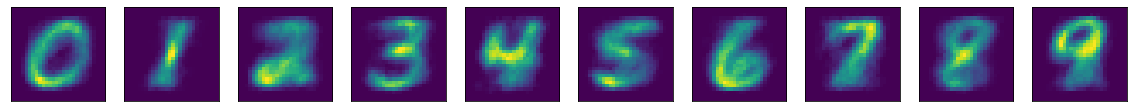

In [ ]:
show_10_imgs(digit_ref)

In [ ]:
digit_ref[digit_ref < 0.2] = 0

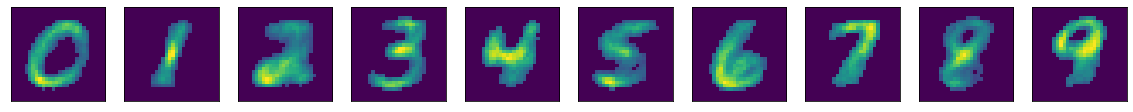

In [ ]:
show_10_imgs(digit_ref)

In [ ]:
# digit_ref[digit_ref != 0] = 1

In [ ]:
# show_10_imgs(digit_ref)

In [ ]:
num_dic={}
for idx, num in enumerate(digit_ref):
  num_dic[idx] = num.reshape(28, 28, 1)
num_dic

{0: array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
     

In [ ]:
num_dic[0].shape

(28, 28, 1)

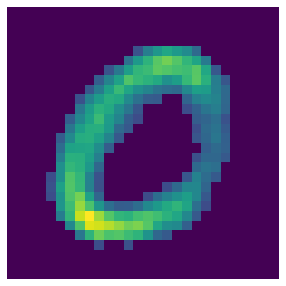

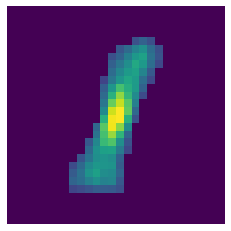

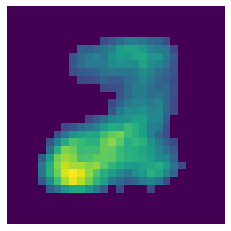

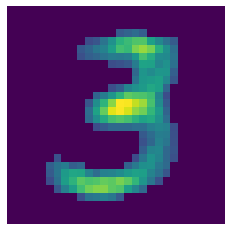

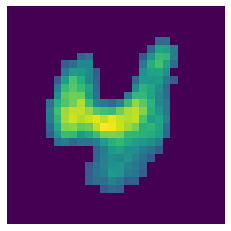

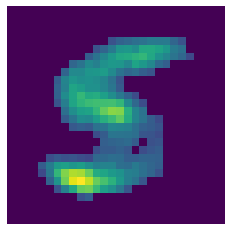

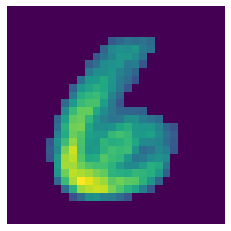

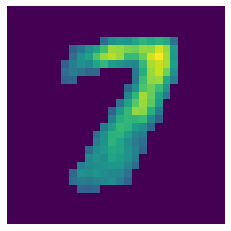

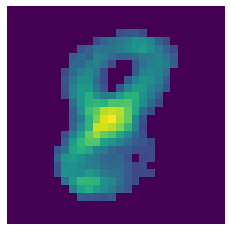

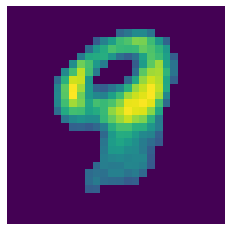

In [ ]:
plt.figure(figsize=(10,5))
for val in num_dic.values(): 
  plt.imshow(val.reshape(28,28))
  plt.axis('off')
  plt.show()

In [ ]:
y[0]

5

In [ ]:
x_train_dap = []
for i in range(x_train.shape[0]):
  x_train_dap.append(num_dic[y[i]])
x_train_dap = np.array(x_train_dap)
type(x_train_dap)

numpy.ndarray

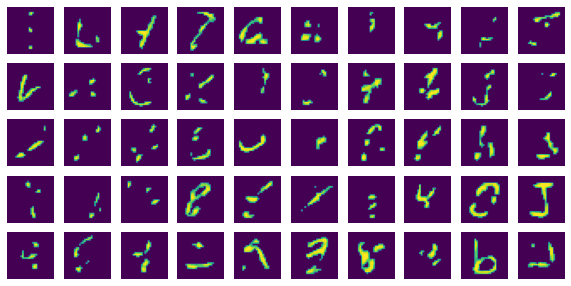

In [ ]:
#원본
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(x_train[i].reshape(28,28))
  plt.axis('off')
plt.show()

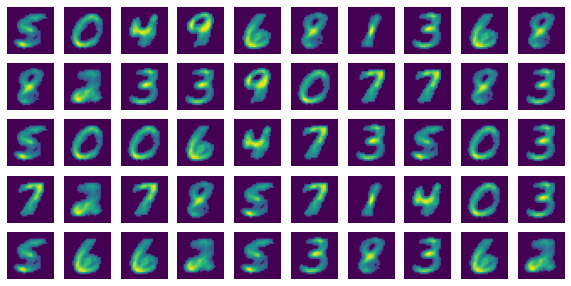

In [ ]:
#답본
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(x_train_dap[i].reshape(28,28))
  plt.axis('off')
plt.show()

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
input_layer = layers.Input(shape=(28,28,1)) 
Encoding = layers.Conv2D(128,(2,2),strides=(2,2), padding='same',activation='relu')(input_layer)
Encoding = layers.MaxPooling2D((1, 1), padding='same')(Encoding)
Encoding = layers.Conv2D(64,(2,2),strides=(2,2), padding='same',activation='relu')(Encoding)

Decoding = layers.Conv2DTranspose(128,(2,2),strides=(2,2), padding='same',activation='relu')(Encoding)
Decoding = layers.Conv2DTranspose(1,(2,2),strides=(2,2), padding='same',activation='sigmoid')(Decoding)
autoencoder = models.Model(input_layer,Decoding)
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          32832     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 128)       32896     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         513       
Total params: 66,881
Trainable params: 66,881
Non-trainable params: 0
__________________________________________________

In [ ]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
autoencoder.fit(x_train, x_train_dap, epochs=50, shuffle=True, validation_split=0.2, verbose=2)

Epoch 1/50
52/52 - 0s - loss: 0.5024 - val_loss: 0.3252
Epoch 2/50
52/52 - 0s - loss: 0.3175 - val_loss: 0.3125
Epoch 3/50
52/52 - 0s - loss: 0.3137 - val_loss: 0.3109
Epoch 4/50
52/52 - 0s - loss: 0.3128 - val_loss: 0.3106
Epoch 5/50
52/52 - 0s - loss: 0.3125 - val_loss: 0.3098
Epoch 6/50
52/52 - 0s - loss: 0.3122 - val_loss: 0.3099
Epoch 7/50
52/52 - 0s - loss: 0.3119 - val_loss: 0.3096
Epoch 8/50
52/52 - 0s - loss: 0.3117 - val_loss: 0.3098
Epoch 9/50
52/52 - 0s - loss: 0.3117 - val_loss: 0.3094
Epoch 10/50
52/52 - 0s - loss: 0.3119 - val_loss: 0.3094
Epoch 11/50
52/52 - 0s - loss: 0.3116 - val_loss: 0.3093
Epoch 12/50
52/52 - 0s - loss: 0.3115 - val_loss: 0.3095
Epoch 13/50
52/52 - 0s - loss: 0.3115 - val_loss: 0.3094
Epoch 14/50
52/52 - 0s - loss: 0.3114 - val_loss: 0.3092
Epoch 15/50
52/52 - 0s - loss: 0.3115 - val_loss: 0.3093
Epoch 16/50
52/52 - 0s - loss: 0.3114 - val_loss: 0.3094
Epoch 17/50
52/52 - 0s - loss: 0.3114 - val_loss: 0.3096
Epoch 18/50
52/52 - 0s - loss: 0.3115 - 

In [ ]:
predict_autoencoded_img = autoencoder.predict(x_test)

In [ ]:
train_predicted = autoencoder.predict(x_train)

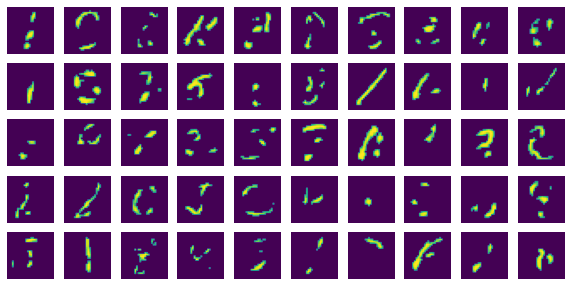

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.axis('off')
plt.show()

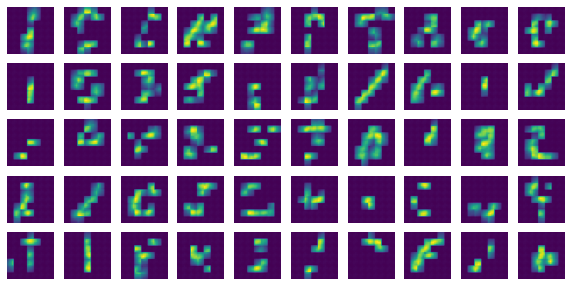

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_autoencoded_img[i].reshape(28,28))  
  plt.axis('off')
plt.show()

In [ ]:
P_train = train_predicted.tolist()
P_train = np.array(P_train)
P_train = P_train/255
P_train.shape

(2048, 28, 28, 1)

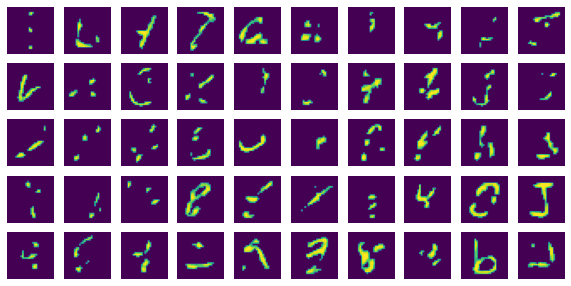

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(x_train[i].reshape(28,28))  
  plt.axis('off')
plt.show()

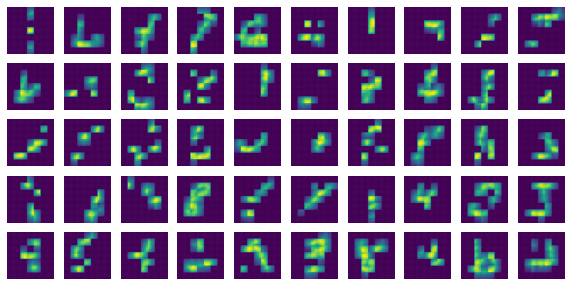

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(train_predicted[i].reshape(28,28))  
  plt.axis('off')
plt.show()

Train model

In [ ]:
# data 뻥튀기

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=40,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.01, # Randomly zoom image 
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    fill_mode="nearest"
        )

In [ ]:
# dropout_rate=0.5
model = Sequential()
model.add(Conv2D(256, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(Conv2D(256, kernel_size = 3, activation='relu'))
model.add(Conv2D(256, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.5))



model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 256)       2560      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 256)       590080    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 256)       1638656   
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 128)       295040    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 128)        

In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [ ]:
x_train.shape

(2048, 28, 28, 1)

In [ ]:
# 그냥 x_train
validation=0.2
epochs = 40
model.fit(x_train, y_train, epochs=epochs, verbose=1, validation_split=validation)


Epoch 1/40
52/52 [==============================] - 2s 36ms/step - loss: 2.2097 - accuracy: 0.1697 - val_loss: 1.9305 - val_accuracy: 0.3244
Epoch 2/40
52/52 [==============================] - 1s 28ms/step - loss: 1.9071 - accuracy: 0.3303 - val_loss: 1.7526 - val_accuracy: 0.3854
Epoch 3/40
52/52 [==============================] - 1s 28ms/step - loss: 1.7100 - accuracy: 0.4042 - val_loss: 1.5634 - val_accuracy: 0.4756
Epoch 4/40
52/52 [==============================] - 1s 27ms/step - loss: 1.5721 - accuracy: 0.4652 - val_loss: 1.5671 - val_accuracy: 0.4634
Epoch 5/40
52/52 [==============================] - 1s 28ms/step - loss: 1.4905 - accuracy: 0.5024 - val_loss: 1.4240 - val_accuracy: 0.4927
Epoch 6/40
52/52 [==============================] - 1s 28ms/step - loss: 1.4021 - accuracy: 0.5244 - val_loss: 1.4060 - val_accuracy: 0.5293
Epoch 7/40
52/52 [==============================] - 1s 28ms/step - loss: 1.3228 - accuracy: 0.5476 - val_loss: 1.3800 - val_accuracy: 0.5317
Epoch 8/40
52

In [ ]:
model = Sequential()
model.add(Conv2D(256, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(Conv2D(256, kernel_size = 3, activation='relu'))
model.add(Conv2D(256, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.5))



model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 256)       2560      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 256)       590080    
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 256)       1638656   
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 128)       295040    
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 4, 4, 128)        

In [ ]:
# 디노이즈 오토인코더만

validation=0.2
epochs = 40
model.fit(P_train, y_train, epochs=epochs, verbose=1, validation_split=validation )
# epochs = 40

Epoch 1/40
52/52 [==============================] - 2s 32ms/step - loss: 2.3033 - accuracy: 0.1117 - val_loss: 2.3098 - val_accuracy: 0.0756
Epoch 2/40
52/52 [==============================] - 1s 27ms/step - loss: 2.3016 - accuracy: 0.1239 - val_loss: 2.3069 - val_accuracy: 0.0756
Epoch 3/40
52/52 [==============================] - 1s 27ms/step - loss: 2.2991 - accuracy: 0.1252 - val_loss: 2.3109 - val_accuracy: 0.0756
Epoch 4/40
52/52 [==============================] - 1s 27ms/step - loss: 2.2996 - accuracy: 0.1215 - val_loss: 2.3133 - val_accuracy: 0.0756
Epoch 5/40
52/52 [==============================] - 1s 27ms/step - loss: 2.2999 - accuracy: 0.1245 - val_loss: 2.3113 - val_accuracy: 0.0756
Epoch 6/40
52/52 [==============================] - 1s 27ms/step - loss: 2.2969 - accuracy: 0.1233 - val_loss: 2.3150 - val_accuracy: 0.0756
Epoch 7/40
52/52 [==============================] - 1s 27ms/step - loss: 2.2991 - accuracy: 0.1233 - val_loss: 2.3137 - val_accuracy: 0.0756
Epoch 8/40
52

In [ ]:
# # 그냥 xtrain

# validation=0.2
# epochs = 40
# model.fit(x_train_, y_train_, epochs=epochs, verbose=1, validation_split=validation )
# # epochs = 40

Epoch 1/40
52/52 [==============================] - 4s 72ms/step - loss: 2.3055 - accuracy: 0.1081 - val_loss: 2.3039 - val_accuracy: 0.0756
Epoch 2/40
52/52 [==============================] - 4s 68ms/step - loss: 2.3016 - accuracy: 0.1239 - val_loss: 2.3065 - val_accuracy: 0.0756
Epoch 3/40
52/52 [==============================] - 4s 68ms/step - loss: 2.2997 - accuracy: 0.1239 - val_loss: 2.3085 - val_accuracy: 0.0756
Epoch 4/40
52/52 [==============================] - 3s 67ms/step - loss: 2.2970 - accuracy: 0.1227 - val_loss: 2.2811 - val_accuracy: 0.1000
Epoch 5/40
52/52 [==============================] - 3s 67ms/step - loss: 2.0751 - accuracy: 0.2527 - val_loss: 1.5826 - val_accuracy: 0.4976
Epoch 6/40
52/52 [==============================] - 4s 67ms/step - loss: 1.4642 - accuracy: 0.5134 - val_loss: 1.0645 - val_accuracy: 0.6512
Epoch 7/40
52/52 [==============================] - 4s 68ms/step - loss: 1.1415 - accuracy: 0.6252 - val_loss: 0.8369 - val_accuracy: 0.7268
Epoch 8/40
52

In [ ]:
# 0.88
epochs = 70
BATCH_SIZE = 32

# Train data 90% : test data 10%로 나눕니다.
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    x_train_, y_train_, test_size = 0.2)

history = model.fit_generator(
    datagen.flow(X_train2, y_train2, batch_size=BATCH_SIZE),
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//BATCH_SIZE,
    validation_data=(X_val2, y_val2), 
    callbacks=[annealer], 
    verbose=1
)


Epoch 1/70
51/51 [==============================] - 4s 74ms/step - loss: 2.3041 - accuracy: 0.0934 - val_loss: 2.3052 - val_accuracy: 0.0878
Epoch 2/70
51/51 [==============================] - 3s 68ms/step - loss: 2.3020 - accuracy: 0.1046 - val_loss: 2.3034 - val_accuracy: 0.0976
Epoch 3/70
51/51 [==============================] - 3s 68ms/step - loss: 2.3003 - accuracy: 0.1146 - val_loss: 2.3072 - val_accuracy: 0.0976
Epoch 4/70
51/51 [==============================] - 3s 68ms/step - loss: 2.3001 - accuracy: 0.1164 - val_loss: 2.3066 - val_accuracy: 0.0976
Epoch 5/70
51/51 [==============================] - 3s 68ms/step - loss: 2.3006 - accuracy: 0.1121 - val_loss: 2.3060 - val_accuracy: 0.0976
Epoch 6/70
51/51 [==============================] - 3s 68ms/step - loss: 2.2999 - accuracy: 0.1158 - val_loss: 2.3068 - val_accuracy: 0.0976
Epoch 7/70
51/51 [==============================] - 3s 68ms/step - loss: 2.3001 - accuracy: 0.1171 - val_loss: 2.3075 - val_accuracy: 0.0976
Epoch 8/70
51

model save

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/데이콘 팀플/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test),axis=1)
submission

,id,digit
0,2049,6
1,2050,9
2,2051,3
3,2052,0
4,2053,3
...,...,...
20475,22524,3
20476,22525,1
20477,22526,6
20478,22527,4


In [ ]:
name = 'test0909_2'#이름
submission.to_csv('/content/drive/My Drive/데이콘 팀플/{}.csv'.format(name), index=False)#경로
model.save('/content/drive/My Drive/데이콘 팀플/{}.h5'.format(name))#경로

학습결과 시각화

Predict

In [ ]:
data_list2 = []
for i in tqdm(range(len(test))):    #data는 엑셀 데이터(즉, 원본 데이터)
  image = Image.open('/content/gdrive/My Drive/데이콘 공유/open_cv_이미지 파일/image_test_updated/image_{}.jpg'.format(i)) #위에 디렉토리에서 사진을 가져오기
  data = asarray(image)
  data_list2.append(data)
x_test = np.array(data_list2)         #저는 train 데이터를 넣어서 X_train으로 이름 지었습니다.
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255
# x_test

In [ ]:
submission = pd.read_csv('/content/gdrive/My Drive/project/Mnist cnn dacon/data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
now = datetime.datetime.now().strftime('%Y-%m-%d %H_%M_%S')
submission.to_csv('DACON_08_'+ now +'.csv', index=False)

,id,digit
0,2049,6
1,2050,9
2,2051,6
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,8
